# Matrix stress test

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext nb_black
sns.set_theme(style="whitegrid")

<IPython.core.display.Javascript object>

## 21 room, 50 active users per room, 10 messages per user, ~17 parallel connections
### 2xCPU, 2xGB Ram, 256xMB swap

Файл `message.log` содержит отрезки времени которые понадобились для отправки 10-ти сообщений пользователю.

In [6]:
data_messages = pd.read_csv('message.log', names = ['time'])
data_messages = data_messages.apply(lambda x: x/10**9, axis=1)

In [36]:
data_messages.describe()

,time
count,1069.000000
mean,3.898389
std,1.939631
min,1.996662
25%,3.158902
50%,3.487066
75%,3.843997
max,16.800013


<IPython.core.display.Javascript object>

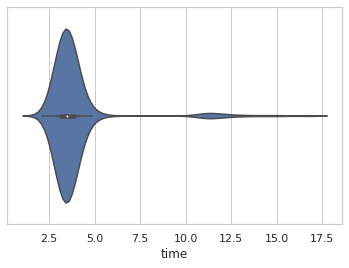

<IPython.core.display.Javascript object>

In [40]:
ax = sns.violinplot(x="time", hue="time", data=data_messages, scale="count")

Файл `join.log` содержит отрезки времени которые понадобились пользователям для подсоеденения к комнате в среднем с 100-500 пользователями и 2000-5000 сообщений.

In [29]:
data_join = pd.read_csv("join.log", names=["time"])
data_join = data_join.apply(lambda x: x / 10 ** 9, axis=1)

<IPython.core.display.Javascript object>

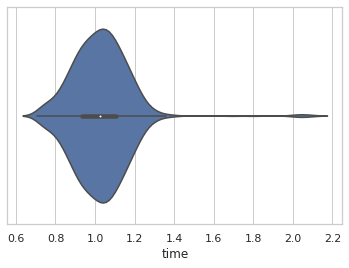

<IPython.core.display.Javascript object>

In [33]:
ax = sns.violinplot(x="time", hue="time", data=data_join, scale="count")

In [37]:
data_join.describe()

,time
count,1069.000000
mean,1.025310
std,0.147696
min,0.707512
25%,0.934676
50%,1.023396
75%,1.106529
max,2.099496


<IPython.core.display.Javascript object>

### Наблюдения

В среднем потребление RAM находилось около 700MB, СPU был полностью загружен. К концу теста SWAP был полностью использован. Редко наблюдались ошибки PostgresQL связанные с слишком большим количеством желающих сделать операцию UPDATE:
```
ERROR:  could not serialize access due to concurrent update
UPDATE pushers SET last_stream_ordering = 1712
```

**Вывод:** тест нельзя считать очень честным, так как открыто было всего ~17 соединений, больше не позволила моя машина. Если же этим пренебречь, то можно считать что как минимум 600+ активных пользователей пишущих одновременно можно содержать таким сервером.


### Screenshot proof


<img src="./photo_2020-10-01_20-23-44.jpg" width="300">